In [20]:
import pandas as pd
import re
import os
print(os.getcwd())


C:\Users\utkar


# Loading of the Dataset

In [24]:
# Read the Excel files
df1 = pd.read_excel('Amazon beauty reviews.xlsx')
df2 = pd.read_excel('Amazon electronics reviews.xlsx')
df3 = pd.read_excel('Amazon furniture reviews.xlsx')
df4 = pd.read_excel('books_final.xlsx')

In [26]:
# List of DataFrames
dataframes = [df1, df2, df3, df4]

# Concatenate all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined data to CSV
combined_data.to_csv("combined_amazon_reviews.csv", index=False)
print("Combined data saved as 'combined_amazon_reviews.csv'")

Combined data saved as 'combined_amazon_reviews.csv'


In [16]:
combined_data.columns

Index(['customer_id', 'review_id', 'product_id', 'product_parent',
       'product_title', 'product_category', 'star_rating', 'total_votes',
       'vine', 'verified_purchase', 'review_headline', 'review_body', 'DATE',
       'helpful_votes', 'Date ', 'marketplace', 'Date'],
      dtype='object')

In [18]:
combined_data.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,total_votes,vine,verified_purchase,review_headline,review_body,DATE,helpful_votes,Date,marketplace,Date
0,1797882,R3I2DHQBR577SS,B001ANOOOE,2102612,The Naked Bee Vitmin C Moisturizing Sunscreen ...,Beauty,5,0,N,Y,Five Stars,"Love this, excellent sun block!!",2014-04-26,NaN,NaT,NaN,NaT
1,18381298,R1QNE9NQFJC2Y4,B0016J22EQ,106393691,"Alba Botanica Sunless Tanning Lotion, 4 Ounce",Beauty,5,0,N,Y,Thank you Alba Bontanica!,The great thing about this cream is that it do...,2014-02-22,NaN,NaT,NaN,NaT
2,19242472,R3LIDG2Q4LJBAO,B00HU6UQAG,375449471,"Elysee Infusion Skin Therapy Elixir, 2oz.",Beauty,5,0,N,Y,Five Stars,"Great Product, I'm 65 years old and this is al...",2014-02-02,NaN,NaT,NaN,NaT
3,19551372,R3KSZHPAEVPEAL,B002HWS7RM,255651889,"Diane D722 Color, Perm And Conditioner Process...",Beauty,5,0,N,Y,GOOD DEAL!,I use them as shower caps & conditioning caps....,2014-02-10,NaN,NaT,NaN,NaT
4,14802407,RAI2OIG50KZ43,B00SM99KWU,116158747,Biore UV Aqua Rich Watery Essence SPF50+/PA+++...,Beauty,5,0,N,Y,this soaks in quick and provides a nice base f...,This is my go-to daily sunblock. It leaves no ...,2014-04-02,NaN,NaT,NaN,NaT


In [28]:
# Define the text cleaning function
def clean_text(text):  
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning to the 'review_body' column (if it exists)
if 'review_body' in combined_data.columns:
    combined_data['cleaned_text'] = combined_data['review_body'].apply(clean_text)
else:
    print("Column 'review_body' not found in combined_data.")

In [30]:
# Fill NaN values in 'cleaned_text' column with an empty string
if 'cleaned_text' in combined_data.columns:
    combined_data['cleaned_text'].fillna('', inplace=True)
else:
    print("Column 'cleaned_text' not found in combined_data.")

# Naive Bayes Model

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenization and Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(combined_data['cleaned_text'])

In [34]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load combined dataset
combined_data = pd.read_csv("combined_amazon_reviews.csv")

# Check if 'review_body' exists before applying cleaning
if 'review_body' in combined_data.columns:
    def clean_text(text):
        if isinstance(text, str):  # Check if the input is a string
            text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
            text = text.lower()  # Convert to lowercase
        return text

    # Apply cleaning to the 'review_body' column
    combined_data['cleaned_text'] = combined_data['review_body'].apply(clean_text)

    # Fill NaN values in 'cleaned_text' with an empty string
    combined_data['cleaned_text'].fillna('', inplace=True)

    # Tokenization and Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(combined_data['cleaned_text'])

    print("Tokenization and vectorization complete.")
else:
    print("Column 'review_body' not found in combined_data.")


Tokenization and vectorization complete.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Creating a sentiment column based on star_rating
# Assuming star_rating > 3 means positive sentiment, else negative
if 'star_rating' in combined_data.columns:
    combined_data['sentiment'] = combined_data['star_rating'].apply(lambda x: 1 if x > 3 else 0)

    # Split data into features and target
    y = combined_data['sentiment']
    
    # Ensure X is defined from previous steps
    if 'cleaned_text' in combined_data.columns:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Model training
        nb = MultinomialNB()
        nb.fit(X_train, y_train)

        # Prediction and evaluation
        y_pred = nb.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    else:
        print("Feature matrix X is not defined. Ensure TF-IDF vectorization is complete.")
else:
    print("Column 'star_rating' not found in combined_data.")


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.77      1.00      0.87       308

    accuracy                           0.77       400
   macro avg       0.39      0.50      0.44       400
weighted avg       0.59      0.77      0.67       400



C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.cluster import KMeans

# Ensure that X is defined from previous TF-IDF vectorization
if 'X' in locals():
    # Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)

    # Assign cluster labels to the original DataFrame
    combined_data['Cluster'] = kmeans.labels_

    # Check cluster centers
    print("Cluster Centers:", kmeans.cluster_centers_)
else:
    print("Feature matrix X is not defined. Ensure TF-IDF vectorization is complete.")

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers: [[0.00055277 0.         0.         ... 0.         0.         0.        ]
 [0.0022582  0.00145699 0.00015325 ... 0.0002521  0.00050894 0.00012518]]


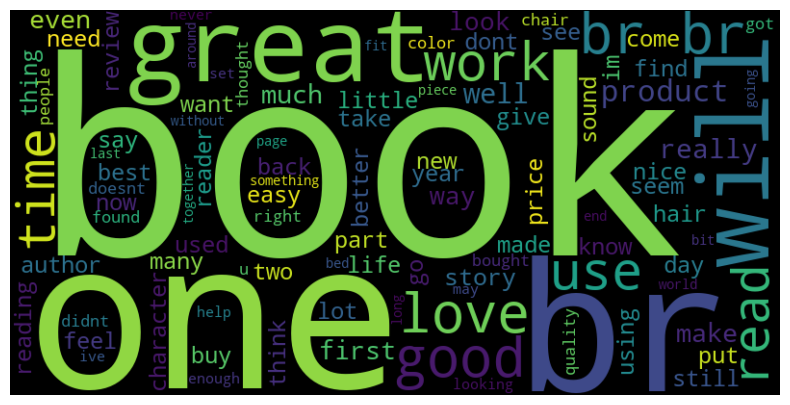

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check if 'cleaned_text' exists in the DataFrame
if 'cleaned_text' in combined_data.columns:
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(" ".join(combined_data['cleaned_text']))

    # Display the word cloud
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("Column 'cleaned_text' not found in combined_data.")


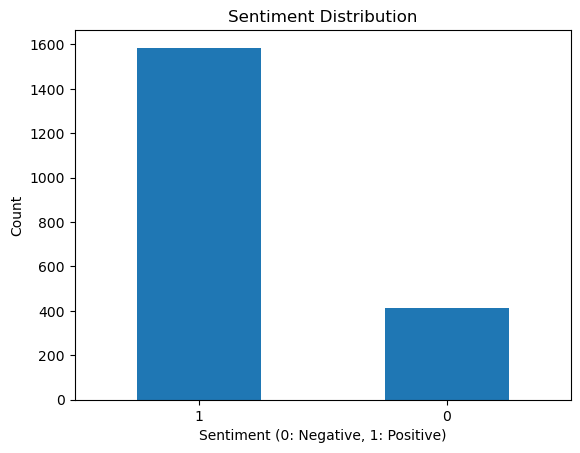

In [49]:
# Check if 'sentiment' exists in the DataFrame
if 'sentiment' in combined_data.columns:
    # Plot sentiment distribution
    combined_data['sentiment'].value_counts().plot(kind='bar')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment (0: Negative, 1: Positive)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
    plt.show()
else:
    print("Column 'sentiment' not found in combined_data.")

others

In [53]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load your dataset
combined_data = pd.read_csv("combined_amazon_reviews.csv")

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

# Check if 'review_body' exists in the DataFrame
if 'review_body' in combined_data.columns:
    # Apply cleaning to the 'review_body' column
    combined_data['cleaned_text'] = combined_data['review_body'].apply(clean_text)

    # Fill NaN values in 'cleaned_text' with an empty string
    combined_data['cleaned_text'].fillna('', inplace=True)

    # Create labels (e.g., positive if star_rating >= 4, else negative)
    if 'star_rating' in combined_data.columns:
        combined_data['sentiment'] = combined_data['star_rating'].apply(lambda x: 1 if x >= 4 else 0)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            combined_data['cleaned_text'],
            combined_data['sentiment'],
            test_size=0.2,
            random_state=42
        )
        
        print("Data preparation complete. Training and testing sets created.")
    else:
        print("Column 'star_rating' not found in combined_data.")
else:
    print("Column 'review_body' not found in combined_data.")

Data preparation complete. Training and testing sets created.


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Check if X_train and X_test are defined
if 'X_train' in locals() and 'X_test' in locals():
    # Fit and transform the training data
    X_train_vec = vectorizer.fit_transform(X_train)

    # Transform the testing data
    X_test_vec = vectorizer.transform(X_test)

    print("TF-IDF Vectorization complete.")
else:
    print("X_train and/or X_test are not defined. Ensure data preparation steps are complete.")

TF-IDF Vectorization complete.


In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Check if X_train_vec, y_train, X_test_vec, and y_test are defined
if 'X_train_vec' in locals() and 'y_train' in locals() and 'X_test_vec' in locals() and 'y_test' in locals():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy}")
    print(report)
else:
    print("One or more of the required variables (X_train_vec, y_train, X_test_vec, y_test) are not defined. Ensure vectorization and data preparation steps are complete.")

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.77      1.00      0.87       308

    accuracy                           0.77       400
   macro avg       0.39      0.50      0.44       400
weighted avg       0.59      0.77      0.67       400



C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Unique Predictions: [1]
Counts of Predictions: [400]


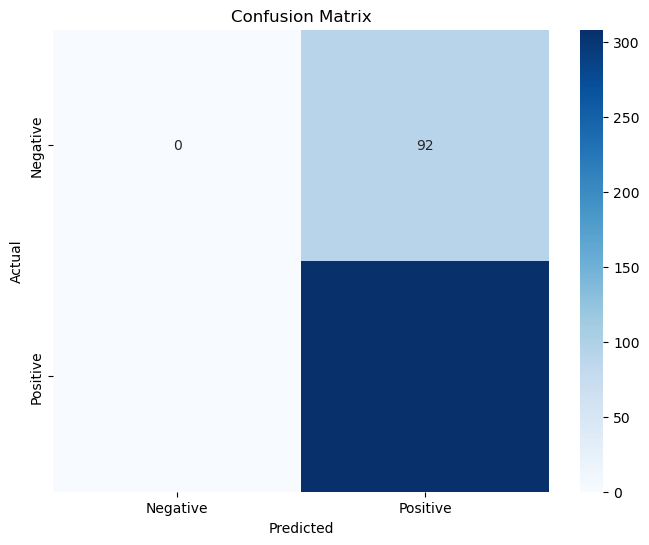

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Check if y_test and y_pred are defined
if 'y_test' in locals() and 'y_pred' in locals():
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Debugging: Print unique values and counts of predictions
    unique_predictions, counts = np.unique(y_pred, return_counts=True)
    print("Unique Predictions:", unique_predictions)
    print("Counts of Predictions:", counts)

    # Set up the figure for the heatmap
    plt.figure(figsize=(8, 6))
    
    # Create the heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Negative', 'Positive'],
                 yticklabels=['Negative', 'Positive'])
    
    # Add labels and title
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()
else:
    print("One or both of the required variables (y_test, y_pred) are not defined. Ensure model predictions are complete.")


# Linear and Logistic Regression Model

In [89]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model using the transformed training data
linear_model.fit(X_train_vec, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test_vec)

# For evaluation, you can round predictions to get binary outcomes
y_linear_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_linear_pred]

# Evaluate the model
linear_accuracy = accuracy_score(y_test, y_linear_pred_binary)
linear_report = classification_report(y_test, y_linear_pred_binary)

print(f"Linear Regression Accuracy: {linear_accuracy}")
print(linear_report)

Linear Regression Accuracy: 0.7125
              precision    recall  f1-score   support

           0       0.40      0.49      0.44        92
           1       0.84      0.78      0.81       308

    accuracy                           0.71       400
   macro avg       0.62      0.63      0.62       400
weighted avg       0.74      0.71      0.72       400



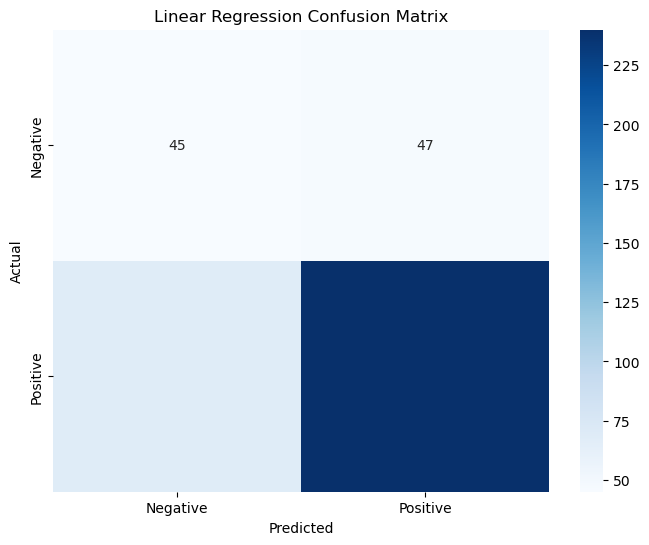

In [91]:
# Confusion Matrix for Linear Regression
conf_matrix_linear = confusion_matrix(y_test, y_linear_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Negative', 'Positive'],
             yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Linear Regression Confusion Matrix')
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
logistic_model.fit(X_train_vec, y_train)

# Make predictions
y_logistic_pred = logistic_model.predict(X_test_vec)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
logistic_report = classification_report(y_test, y_logistic_pred)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(logistic_report)

Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.05      0.10        92
           1       0.78      1.00      0.87       308

    accuracy                           0.78       400
   macro avg       0.81      0.53      0.49       400
weighted avg       0.79      0.78      0.70       400



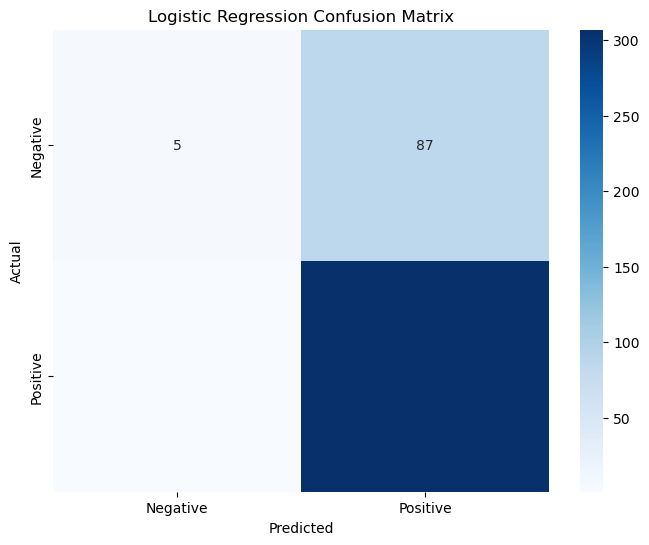

In [95]:
# Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Negative', 'Positive'],
             yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [97]:
# Collect model performance metrics
model_performance = {
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    },
    'Linear Regression': {
        'Accuracy': linear_accuracy,
        'Classification Report': classification_report(y_test, y_linear_pred_binary, output_dict=True)
    },
    'Logistic Regression': {
        'Accuracy': logistic_accuracy,
        'Classification Report': classification_report(y_test, y_logistic_pred, output_dict=True)
    }
}

# Display performance metrics
for model, metrics in model_performance.items():
    print(f"{model} Accuracy: {metrics['Accuracy']:.2f}")
    print(f"{model} Classification Report:\n{metrics['Classification Report']}\n")

Naive Bayes Accuracy: 0.77
Naive Bayes Classification Report:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 92}, '1': {'precision': 0.77, 'recall': 1.0, 'f1-score': 0.8700564971751412, 'support': 308}, 'accuracy': 0.77, 'macro avg': {'precision': 0.385, 'recall': 0.5, 'f1-score': 0.4350282485875706, 'support': 400}, 'weighted avg': {'precision': 0.5929, 'recall': 0.77, 'f1-score': 0.6699435028248587, 'support': 400}}

Linear Regression Accuracy: 0.71
Linear Regression Classification Report:
{'0': {'precision': 0.39823008849557523, 'recall': 0.4891304347826087, 'f1-score': 0.43902439024390244, 'support': 92}, '1': {'precision': 0.8362369337979094, 'recall': 0.7792207792207793, 'f1-score': 0.8067226890756303, 'support': 308}, 'accuracy': 0.7125, 'macro avg': {'precision': 0.6172335111467423, 'recall': 0.634175607001694, 'f1-score': 0.6228735396597663, 'support': 400}, 'weighted avg': {'precision': 0.7354953593783725, 'recall': 0.7125, 'f1-score': 0.7221520803443329,

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


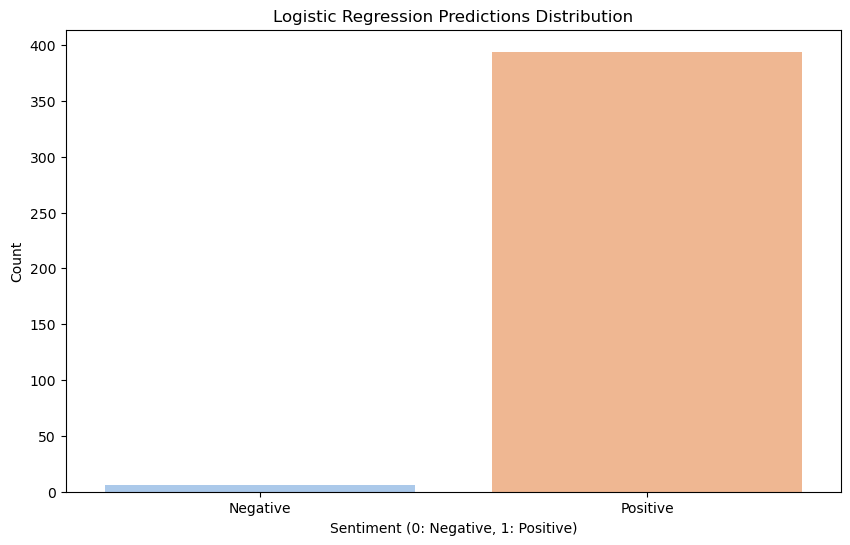

C:\Users\utkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


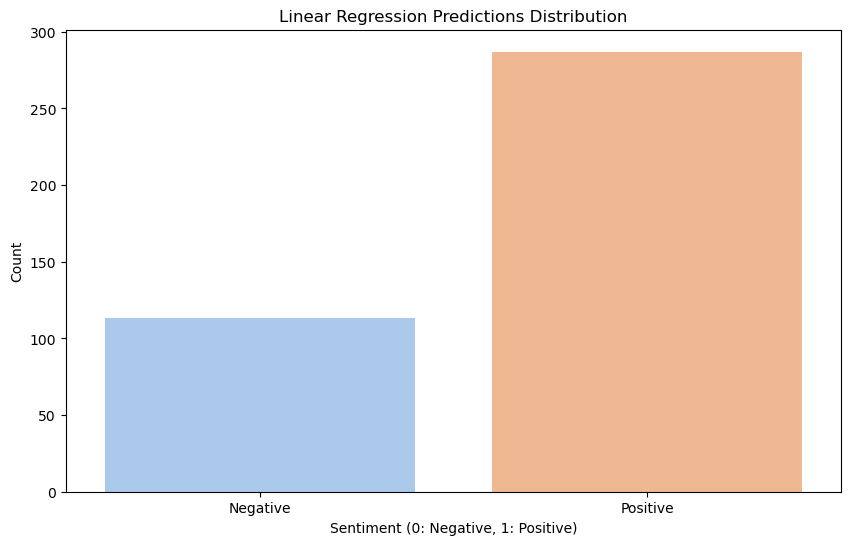

In [111]:
# Plot distribution of predictions for Logistic Regression
plt.figure(figsize=(10, 6))
sns.countplot(x=y_logistic_pred, palette='pastel')
plt.title('Logistic Regression Predictions Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

# Similarly for Linear Regression
plt.figure(figsize=(10, 6))
sns.countplot(x=y_linear_pred_binary, palette='pastel')
plt.title('Linear Regression Predictions Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

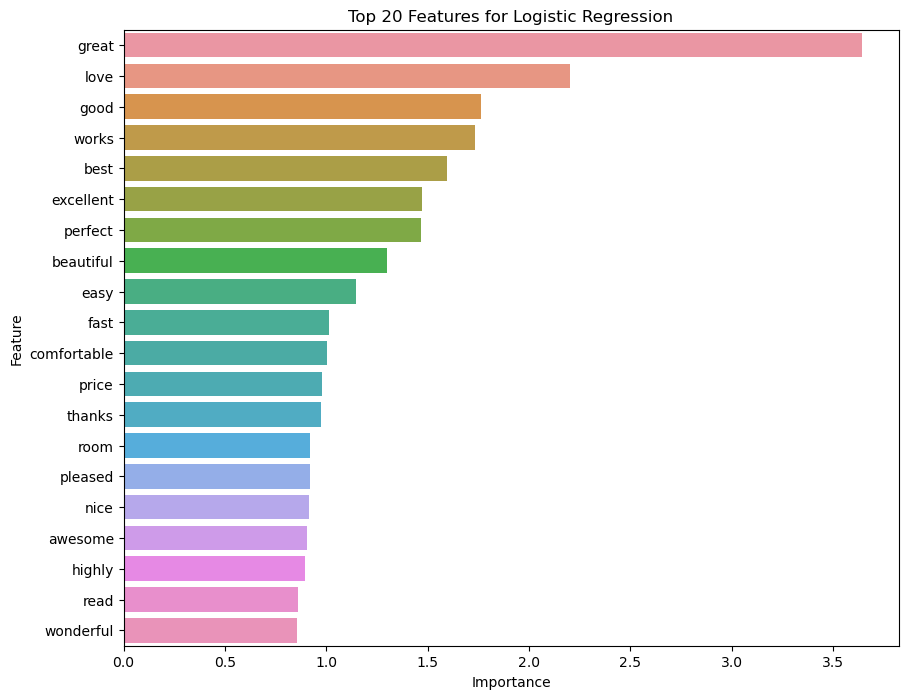

In [99]:
# Feature importance for Logistic Regression
importance = logistic_model.coef_[0]
features = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Features for Logistic Regression')
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # You can also try 'elasticnet'
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train_vec, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2'}


In [103]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cross_val_scores = cross_val_score(logistic_model, X_train_vec, y_train, cv=5)
print("Cross-Validation Scores for Logistic Regression:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores for Logistic Regression: [0.803125   0.80625    0.796875   0.809375   0.80564263]
Mean Cross-Validation Score: 0.804253526645768


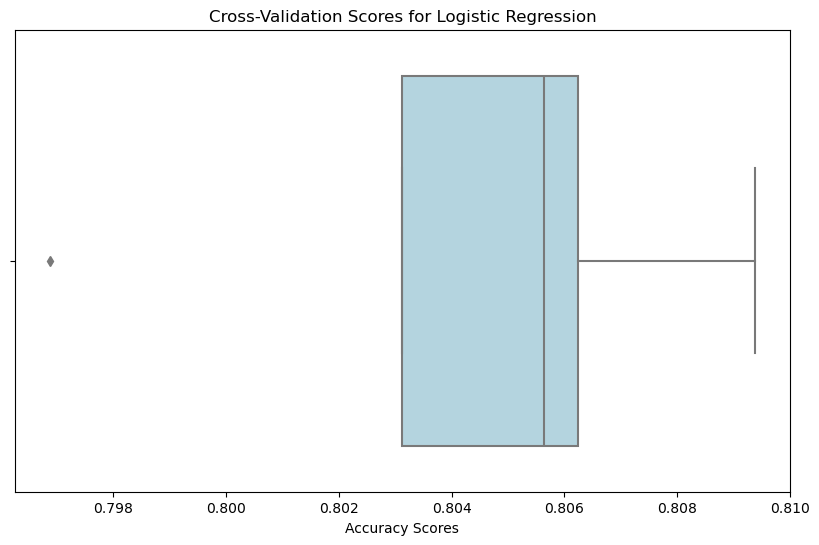

In [109]:
# Cross-Validation Scores Plot for Logistic Regression
plt.figure(figsize=(10, 6))
sns.boxplot(x=cross_val_scores, color='lightblue')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.xlabel('Accuracy Scores')
plt.show()

# Models Comparision

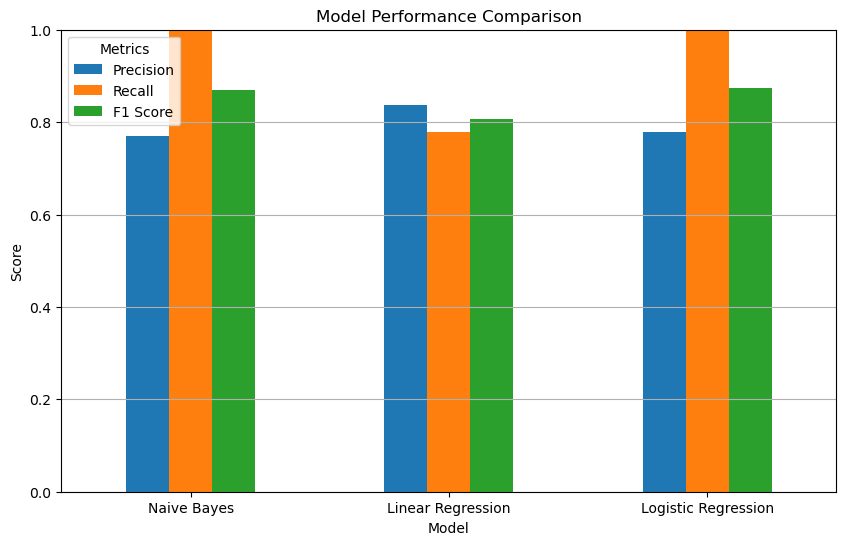

In [107]:
# Extract metrics for bar plot
models = ['Naive Bayes', 'Linear Regression', 'Logistic Regression']
precision = [
    model_performance['Naive Bayes']['Classification Report']['1']['precision'],
    model_performance['Linear Regression']['Classification Report']['1']['precision'],
    model_performance['Logistic Regression']['Classification Report']['1']['precision'],
]
recall = [
    model_performance['Naive Bayes']['Classification Report']['1']['recall'],
    model_performance['Linear Regression']['Classification Report']['1']['recall'],
    model_performance['Logistic Regression']['Classification Report']['1']['recall'],
]
f1_score = [
    model_performance['Naive Bayes']['Classification Report']['1']['f1-score'],
    model_performance['Linear Regression']['Classification Report']['1']['f1-score'],
    model_performance['Logistic Regression']['Classification Report']['1']['f1-score'],
]

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Set the model column as the index
metrics_df.set_index('Model', inplace=True)

# Plot the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()
